In [1]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support() 
import os
from specutils import Spectrum1D, SpectralRegion
import lineid_plot
import pandas as pd
from astropy.modeling import models
from specutils.manipulation import noise_region_uncertainty
from specutils.fitting import find_lines_threshold

In [2]:
# Manually constructed line list
data = [['O IV', 1033.82], ['Lya', 1215.24], ['N V', 1240.81], ['O I', 1305.53], ['C II', 1335.31], ['Si IV', 1397.61], ['Si IV + O IV', 1399.8], ['C IV', 1549.48], ['He II', 1640.4], ['O III', 1665.85], ['Al III', 1857.4], ['C III', 1908.734], ['C II', 2326.0], ['Ne IV', 2439.5], ['Mg II', 2799.117], ['Ne V', 2439.5], ['Ne VI', 3426.85], ['O II', 3727.092], ['O II', 3729.875], ['He I', 3889.0], ['S II', 4072.3], ['H Delta', 4102.89], ['H Gamma', 4341.68], ['O III', 4364.436], ['H Beta', 4862.68], ['O III', 4932.603], ['O III', 4960.295], ['O III', 5008.240], ['O I', 6302.046], ['O I', 6365.536], ['N I', 6529.03], ['N II', 6549.86], ['H Alpha', 6564.61], ['N II', 6585.27], ['S II', 6718.29], ['S II', 6732.67]]
df = pd.DataFrame(data, columns = ['Line', 'Wave'])

In [3]:
path = '/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less'

In [4]:
for root, directories, files in os.walk(path, topdown=False):

    for name in files:
        print(os.path.join(root, name))

/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7337/spec-7337-56662-0040.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/10659/spec-10659-58161-0810.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7243/spec-7243-56629-0626.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/9607/spec-9607-58085-0030.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/8839/spec-8839-57846-0386.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7027/spec-7027-56448-0390.fits
/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/.DS_Store


In [5]:
f1 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7337/spec-7337-56662-0040.fits')
f2 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/10659/spec-10659-58161-0810.fits')
f3 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7243/spec-7243-56629-0626.fits')
f4 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/9607/spec-9607-58085-0030.fits')
f5 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/8839/spec-8839-57846-0386.fits')
f6 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7027/spec-7027-56448-0390.fits')

In [6]:
f1.info()

Filename: /Users/quinncasey/Desktop/research/eboss/0.2-bin/0.2-spec-files-less/7337/spec-7337-56662-0040.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1                1 BinTableHDU     33   4624R x 8C   [E, E, E, J, J, E, E, E]   
  2                1 BinTableHDU    501   1R x 236C   [8A, 7A, 4A, E, E, J, J, E, J, E, E, E, K, K, K, K, K, K, K, K, K, B, B, J, I, 5E, 5E, J, J, J, J, 7A, 7A, 2A, D, D, 6A, 9A, E, E, E, J, E, 21A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, 5E, E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, A, A, A, E, E, E, E, E, E, E, E, J, E, E, J, J, 6A, 9A, E, 35E, 19A, A, 19A, B, B, B, I, 3A, B, I, I, I, I, J, E, J, J, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5J, 75E, 75E, 5E, 5E, 5E, 5J, 5E, D, D, D, D, D, D, D, D, D, 5E, 5E, 5E, 5E, 5E,

In [7]:
f1[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T /                                                
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = '2       '           / ICC version                                    
MJD     =                56662 / APO fMJD day at start of exposure              
MJDLIST = '56660 56661 56662'  /                                                
NAME    = '7337-56660-01'      / The name of the currently loaded plate         
PLATEID =                 7337 / The currently loaded plate                     
TILEID  =                15992 /Cartridge used in this plugging                 
CARTID  =                   

In [8]:
f1[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                   32 /Number of bytes per row                         
NAXIS2  =                 4624 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    8 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [9]:
f1[2].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                 3897 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                  236 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

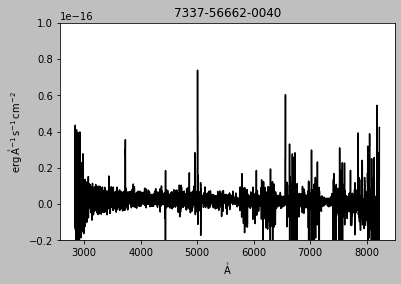

In [10]:
specdata1 = f1[1].data
specdata11 = f1[2].data
f1.close

z1 = specdata11['Z']
lamb1 = (10**specdata1['loglam'] * u.AA)/(1+z1)
flux1 = specdata1['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spectrum1 = Spectrum1D(spectral_axis=lamb1, flux=flux1)


plt.style.use('grayscale')
f1, ax1 = plt.subplots()  
plt.ylim(-2.0*10**-17, 10*10**-17)
plt.title('7337-56662-0040')
ax1.step(spectrum1.spectral_axis, spectrum1.flux) 

In [11]:
noise_region1 = SpectralRegion(0*u.um, 3*u.um)
spectrum1 = noise_region_uncertainty(spectrum1, noise_region1)

lines1 = find_lines_threshold(spectrum1, noise_factor=4)
lines1[lines1['line_type'] == 'emission']  


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
Angstrom,,
float32,str10,int64
2840.799072265625,emission,4
2848.004150390625,emission,15
2849.971435546875,emission,18
2864.444580078125,emission,40
2874.355712890625,emission,55
2875.68017578125,emission,57
2891.615234375,emission,81
2896.946044921875,emission,89


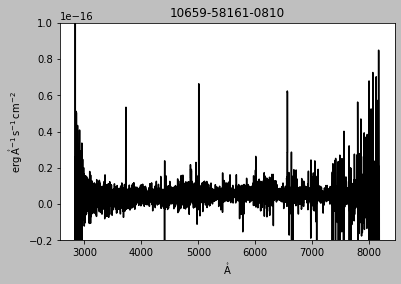

In [12]:
specdata2 = f2[1].data
specdata22 = f2[2].data
f2.close

z2 = specdata22['Z']
lamb2 = (10**specdata2['loglam'] * u.AA)/(1+z2)
flux2 = specdata2['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spectrum2 = Spectrum1D(spectral_axis=lamb2, flux=flux2)

plt.style.use('grayscale')
f2, ax2 = plt.subplots()
plt.title('10659-58161-0810')
plt.ylim(-2.0*10**-17, 10*10**-17)
ax2.step(spectrum2.spectral_axis, spectrum2.flux) 

In [13]:
noise_region2 = SpectralRegion(0*u.um, 3*u.um)
spectrum2 = noise_region_uncertainty(spectrum2, noise_region2)

lines2 = find_lines_threshold(spectrum2, noise_factor=4)
lines2[lines2['line_type'] == 'emission']   


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
Angstrom,,
float32,str10,int64
2838.92236328125,emission,6
2840.230224609375,emission,8
2850.056396484375,emission,23
2851.369140625,emission,25
2855.96875,emission,32
2858.60107421875,emission,36
2859.917724609375,emission,38
2869.152099609375,emission,52


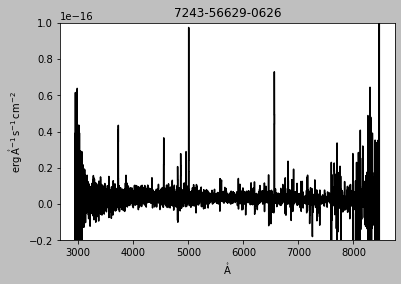

In [14]:
specdata3 = f3[1].data
specdata33 = f3[2].data
f3.close

z3 = specdata33['Z']
lamb3 = (10**specdata3['loglam'] * u.AA)/(1+z3)
flux3 = specdata3['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spectrum3 = Spectrum1D(spectral_axis=lamb3, flux=flux3)

plt.style.use('grayscale')
f3, ax3 = plt.subplots()
plt.ylim(-2.0*10**-17, 10*10**-17)
plt.title('7243-56629-0626')
ax3.step(spectrum3.spectral_axis, spectrum3.flux) 

In [15]:
noise_region3 = SpectralRegion(0*u.um, 3*u.um)
spectrum3 = noise_region_uncertainty(spectrum3, noise_region3)

lines3 = find_lines_threshold(spectrum3, noise_factor=4)
lines3[lines3['line_type'] == 'emission']   


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
Angstrom,,
float32,str10,int64
5008.2041015625,emission,2308
8466.076171875,emission,4588


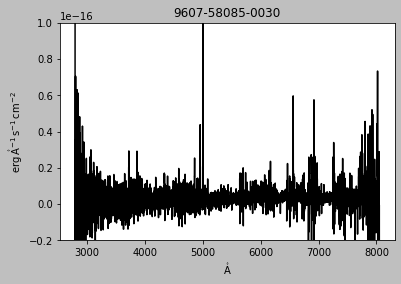

In [16]:
specdata4 = f4[1].data
specdata44 = f4[2].data
f4.close

z4 = specdata44['Z']
lamb4 = (10**specdata4['loglam'] * u.AA)/(1+z4)
flux4 = specdata4['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spectrum4 = Spectrum1D(spectral_axis=lamb4, flux=flux4)

plt.style.use('grayscale')
f4, ax4 = plt.subplots()
plt.ylim(-2.0*10**-17, 10*10**-17)
plt.title('9607-58085-0030')
ax4.step(spectrum4.spectral_axis, spectrum4.flux)

In [17]:
noise_region4 = SpectralRegion(0*u.um, 3*u.um)
spectrum4 = noise_region_uncertainty(spectrum4, noise_region4)

lines4 = find_lines_threshold(spectrum4, noise_factor=4)
lines4[lines4['line_type'] == 'emission']  


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
Angstrom,,
float32,str10,int64
2801.218017578125,emission,0
2802.508544921875,emission,2
2810.91064453125,emission,15
2814.1484375,emission,20
2816.092529296875,emission,23
2819.986572265625,emission,29
2826.48681640625,emission,39
2830.39501953125,emission,45


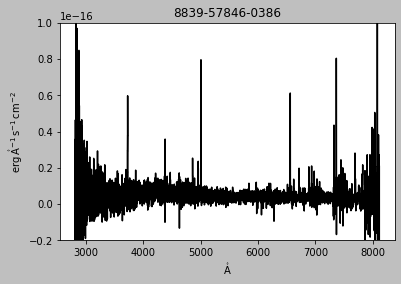

In [18]:
specdata5 = f5[1].data
specdata55 = f5[2].data
f5.close

z5 = specdata55['Z']
lamb5 = (10**specdata5['loglam'] * u.AA)/(1+z5)
flux5 = specdata5['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spectrum5 = Spectrum1D(spectral_axis=lamb5, flux=flux5)

plt.style.use('grayscale')
f5, ax5 = plt.subplots()
plt.ylim(-2.0*10**-17, 10*10**-17)
plt.title('8839-57846-0386')
ax5.step(spectrum5.spectral_axis, spectrum5.flux)

In [19]:
noise_region5 = SpectralRegion(0*u.um, 3*u.um)
spectrum5 = noise_region_uncertainty(spectrum5, noise_region5)

lines5 = find_lines_threshold(spectrum5, noise_factor=4)
lines5[lines5['line_type'] == 'emission']  


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
Angstrom,,
float32,str10,int64
2812.510986328125,emission,0
2817.69580078125,emission,8
2819.642333984375,emission,11
2826.1435546875,emission,21
2829.39892578125,emission,26
2832.0048828125,emission,30
2833.962890625,emission,33
2835.920654296875,emission,36


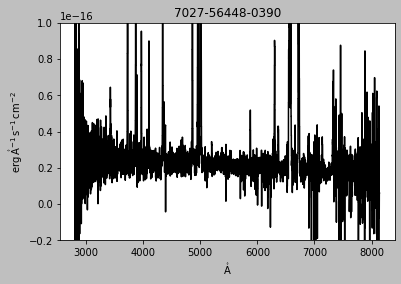

In [20]:
specdata6 = f6[1].data
specdata66 = f6[2].data
f6.close

z6 = specdata66['Z']
lamb6 = (10**specdata6['loglam'] * u.AA)/(1+z6)
flux6 = specdata6['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spectrum6 = Spectrum1D(spectral_axis=lamb6, flux=flux6)

plt.style.use('grayscale')
f6, ax6 = plt.subplots()
plt.title('7027-56448-0390')
plt.ylim(-2.0*10**-17, 10*10**-17)
ax6.step(spectrum6.spectral_axis, spectrum6.flux)

In [21]:
noise_region6 = SpectralRegion(0*u.um, 3*u.um)
spectrum6 = noise_region_uncertainty(spectrum6, noise_region6)

lines6 = find_lines_threshold(spectrum6, noise_factor=4)
lines6[lines6['line_type'] == 'emission']  


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
Angstrom,,
float32,str8,int64
2810.067138671875,emission,3
3728.34912109375,emission,1231
4863.138671875,emission,2385
4959.25830078125,emission,2470
5008.60302734375,emission,2513
6564.7265625,emission,3688
